Saving 1. Predict Loan Default.csv to 1. Predict Loan Default (14).csv
Accuracy:  0.8892
Precision: 0.7391
Recall:    0.0295


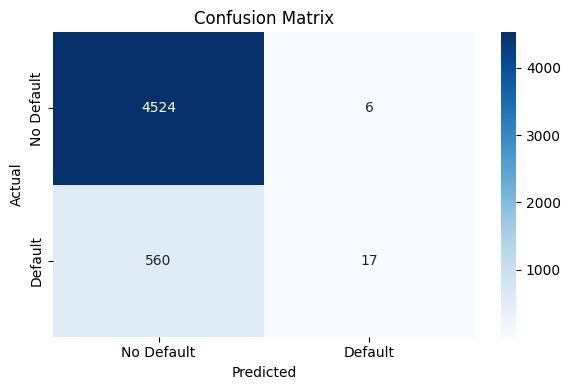

In [4]:
# Install necessary libraries
!pip install seaborn scikit-learn --quiet

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Mount Google Drive (if your file is stored there)
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))

# Drop identifier
df_model = df.drop(columns=["LoanID"])

# Encode categorical features
categorical_cols = df_model.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Sample 10% of the dataset to speed up training
df_sampled = df_model.sample(frac=0.1, random_state=42)

# Features and target
X = df_sampled.drop(columns=['Default'])
y = df_sampled['Default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
